In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection & Analysis

In [38]:
i_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

In [39]:
i_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
i_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [41]:
i_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [42]:
i_data.shape

(1338, 7)

In [43]:
i_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [44]:
i_data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [45]:
i_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [46]:
i_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [47]:
i_data['sex'].unique()

array(['female', 'male'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


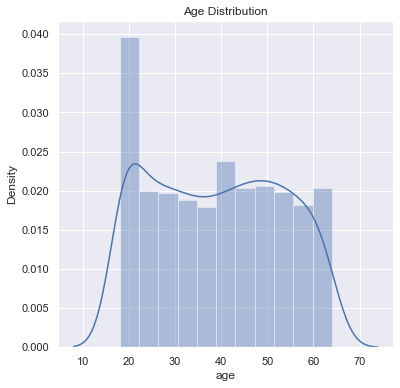

In [48]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(i_data['age'])
plt.title('Age Distribution')
plt.show()

In [49]:
i_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


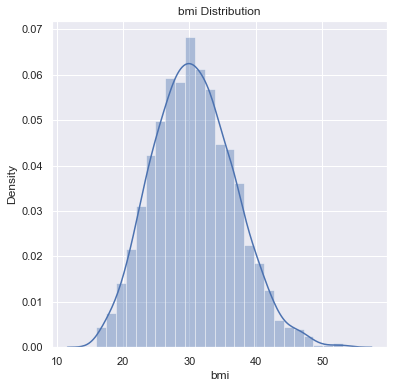

In [50]:
plt.figure(figsize=(6,6))
sns.distplot(i_data['bmi'])
plt.title('bmi Distribution')
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',df=i_data)
plt.title('children')
plt.show()

In [54]:
i_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',df=i_data)
plt.title('smoker')
plt.show()

In [56]:
i_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',df=i_data)
plt.title('region')
plt.show()

In [57]:
i_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


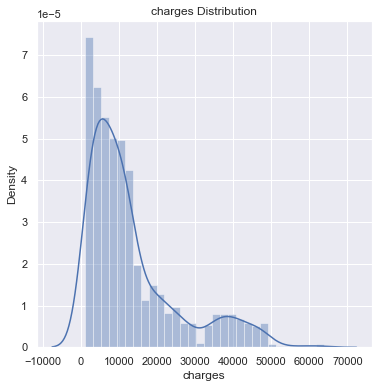

In [58]:
plt.figure(figsize=(6,6))
sns.distplot(i_data['charges'])
plt.title('charges Distribution')
plt.show()

In [65]:
i_data.replace({'sex':{'male':0,'female':1}},inplace=True)

i_data.replace({'smoker':{'no':0,'yes':1}},inplace=True)

i_data.replace({'region':{'southwest':0,'southeast':1,'northeast':2,'northwest':3}},inplace=True)

In [66]:
print(i_data)

      age  sex     bmi  children  smoker  region      charges
0      19    1  27.900         0       1       0  16884.92400
1      18    0  33.770         1       0       1   1725.55230
2      28    0  33.000         3       0       1   4449.46200
3      33    0  22.705         0       0       3  21984.47061
4      32    0  28.880         0       0       3   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    0  30.970         3       0       3  10600.54830
1334   18    1  31.920         0       0       3   2205.98080
1335   18    1  36.850         0       0       1   1629.83350
1336   21    1  25.800         0       0       0   2007.94500
1337   61    1  29.070         0       1       3  29141.36030

[1338 rows x 7 columns]


splitting the fearure and target

In [67]:
x=i_data.drop(columns='charges',axis=1)
y=i_data['charges']

In [68]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       0
1      18    0  33.770         1       0       1
2      28    0  33.000         3       0       1
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       3
1335   18    1  36.850         0       0       1
1336   21    1  25.800         0       0       0
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [69]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting the data info traning data & testing data

In [70]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [71]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model training

Linear regression

loding the model

In [82]:
regressor = LinearRegression()

In [83]:
regressor.fit(x_train,y_train)

LinearRegression()

model evaluation

In [84]:
training_data_prediction = regressor.predict(x_train)

In [86]:
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.7518906898688682


In [87]:
test_data_prediction = regressor.predict(x_test)

In [89]:
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('R squared value:',r2_test)

R squared value: 0.7446514729424184


In [91]:
input_data = (31,1,25.74,0,1,0)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('the insurance cost',prediction[0])

[27527.84223256]
the insurance cost 27527.842232557567


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
